In [19]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords


In [2]:
df = pd.read_json('/content/dataset-tweets-final.json')
df

,id,retweet_count,favorite_count,text,created_at,url,medium_claps,medium_categories
0,1026876138969333800,5,10,How to use JSON padding (and other options) to...,2018-08-07 17:02:04,https://medium.freecodecamp.org/use-jsonp-and-...,177,"[JavaScript, HTML, Web Development, Tutorial, ..."
1,1026831326425505800,7,19,How to build GitHub search functionality in Re...,2018-08-07 14:04:00,https://medium.freecodecamp.org/how-to-build-a...,61,"[React, Tech, Functional Programming, Programm..."
2,1026815727163064300,6,11,How to read and write Mindful Minutes from iOS...,2018-08-07 13:02:01,https://medium.freecodecamp.org/read-write-min...,54,"[iOS, Software Development, Programming, Web D..."
3,1026800632559280100,9,39,"How to make more money on Upwork, by @jpmorris",2018-08-07 12:02:02,https://medium.freecodecamp.org/7-steps-to-mak...,139,"[Freelancing, Tech, Web Development, Web Desig..."
4,1026770178430955500,14,62,Let's build a fun little game: Learn advanced ...,2018-08-07 10:01:01,https://medium.freecodecamp.org/learn-advanced...,342,"[CSS, Games, Tech, Programming, React]"
...,...,...,...,...,...,...,...,...
712,942772604196343800,11,21,Bitcoin: Flipping the Coin,2017-12-18 15:04:39,https://medium.freecodecamp.org/bitcoin-flippi...,861,"[Bitcoin, India, Investing, Cryptocurrency, Bl..."
713,942059619282800600,50,0,RT @ossia: This is the tutorial I wish I had w...,2017-12-16 15:51:30,https://medium.freecodecamp.org/lets-create-an...,1,"[Ruby on Rails, Programming, Web Development, ..."
714,938103588995420200,4,0,RT @beezeecode: Really enjoyed this interview ...,2017-12-05 17:51:39,https://medium.freecodecamp.org/between-the-wi...,376,"[Entrepreneurship, CSS, Technology, Startup, D..."
715,936338255372607500,54,130,How to prototype websites quickly with CSS Gri...,2017-11-30 20:56:51,https://medium.freecodecamp.org/how-to-prototy...,13,"[CSS, Web Development, Design, UX, Web Design]"


PRE-PROCESSING

In [4]:
df['text']

0      How to use JSON padding (and other options) to...
1      How to build GitHub search functionality in Re...
2      How to read and write Mindful Minutes from iOS...
3         How to make more money on Upwork, by @jpmorris
4      Let's build a fun little game: Learn advanced ...
                             ...                        
712                           Bitcoin: Flipping the Coin
713    RT @ossia: This is the tutorial I wish I had w...
714    RT @beezeecode: Really enjoyed this interview ...
715    How to prototype websites quickly with CSS Gri...
716    @DevAlexx @Medium I think this is exactly what...
Name: text, Length: 717, dtype: object

In [5]:
#clean the article title

def clean_text(text):
  text = text.map(lambda x: re.sub(r'\\x[00-ff]{2}','',str(x)))
  text = text.str.strip()
  text = text.map(lambda x:re.sub('b"','',str(x)))
  return text

In [7]:
#remove duplicates
df = df.drop_duplicates(subset=['text'], keep=False)
# Remove some columns to print
df = df.drop(['id', 'created_at', 'url'], axis=1)
#
df['text'] = clean_text(df['text'])
# calculate length of the titles
df['text_lenght'] = df['text'].str.len()
# reorder the columns
df = df[df.columns[[4, 0, 3, 2, 5, 1]]]
# rename the columns
temp = df.rename(index=str, columns={"favorite_count": "Likes (Twitter)", "medium_categories": "Categories (Medium)", "medium_claps": "Claps (Medium)", "retweet_count": "Retweet (Twitter)", "text": "Title (Twitter)", "text_lenght": "Title Length"})
df = df.rename(index=str, columns={"favorite_count": "Likes", "medium_categories": "Categories", "medium_claps": "Claps", "retweet_count": "Retweet", "text": "Title", "text_lenght": "Title Length"})
# limit the total number of lines to print
temp.head()

,Categories (Medium),Retweet (Twitter),Claps (Medium),Title (Twitter),Title Length,Likes (Twitter)
0,"[JavaScript, HTML, Web Development, Tutorial, ...",5,177,How to use JSON padding (and other options) to...,76,10
1,"[React, Tech, Functional Programming, Programm...",7,61,How to build GitHub search functionality in Re...,90,19
2,"[iOS, Software Development, Programming, Web D...",6,54,How to read and write Mindful Minutes from iOS...,81,11
3,"[Freelancing, Tech, Web Development, Web Desig...",9,139,"How to make more money on Upwork, by @jpmorris",46,39
4,"[CSS, Games, Tech, Programming, React]",14,342,Let's build a fun little game: Learn advanced ...,116,62


In [8]:
# calculate length of the titles
df['Title Length'] = df['Title'].str.len()
df.describe()

,Retweet,Claps,Title Length,Likes
count,711.000000,711.000000,711.000000,711.000000
mean,16.438819,285.263010,77.136428,49.291139
std,15.685065,273.451934,20.213779,45.234113
min,0.000000,1.000000,21.000000,0.000000
25%,6.500000,7.500000,62.000000,20.000000
50%,11.000000,238.000000,76.000000,34.000000
75%,20.000000,471.500000,93.000000,63.500000
max,125.000000,997.000000,117.000000,298.000000


Total Retweet: 11688 times
Total Likes: 35046 times
Total Claps: 202822 times


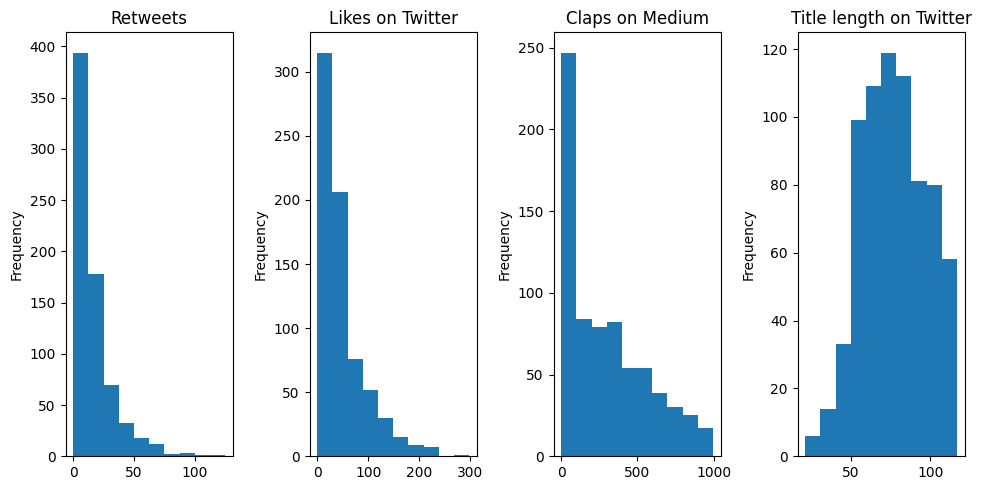

In [9]:
title_length = 'Title Length'
# set the columns that will show statistic and graph
columns = [{'column_name': 'Retweet', 'column_text': 'Retweets'},
           {'column_name': 'Likes', 'column_text': 'Likes on Twitter'},
           {'column_name': 'Claps', 'column_text': 'Claps on Medium'},
           {'column_name': title_length, 'column_text': 'Title length on Twitter'}]

# plot histogram of columns
plt.figure(figsize=(10, 5))
for el in columns:
    class_name = el['column_name']
    column = df[class_name]
    plt.subplot(1, 4, columns.index(el) + 1)
    plt.tight_layout()
    column.plot.hist(orientation='vertical', cumulative=False, title=el['column_text'])
    if class_name != title_length:
        print('Total {}: {} times'.format(class_name, column.sum()))

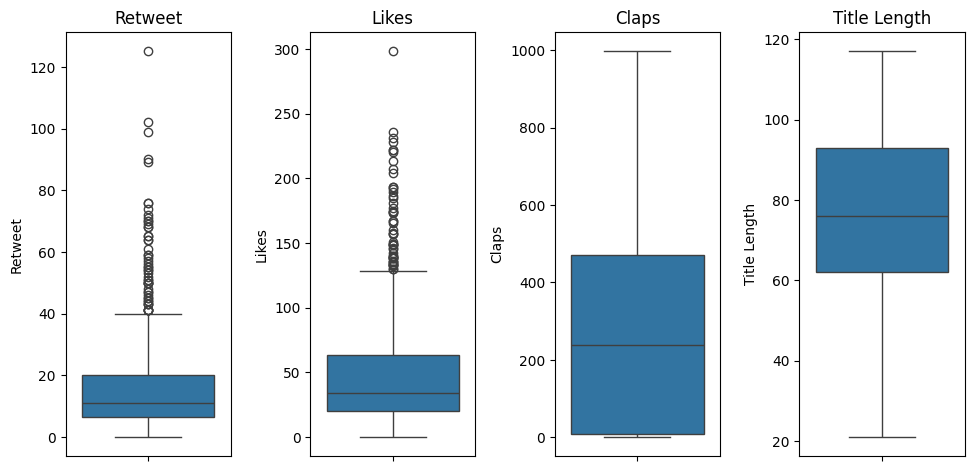

In [10]:
plt.figure(figsize=(10, 5))
for el in columns:
    class_name = el['column_name']
    column = df[class_name]
    plt.subplot(1, 4, columns.index(el) + 1)
    plt.tight_layout()
    plt.title(class_name);
    sns.boxplot(data=column);

From these histograms, together with the overall statistic and the box plots, we can notice that we have a Gaussian distribution for the text length and the average length is around 80 characters. Like, retweet and claps are positive-skewed, i.e. they are concentrated on the left part of the graph, meaning that a small part of the articles will over-perform about readers' interaction and the biggest part of them will generate less interaction.

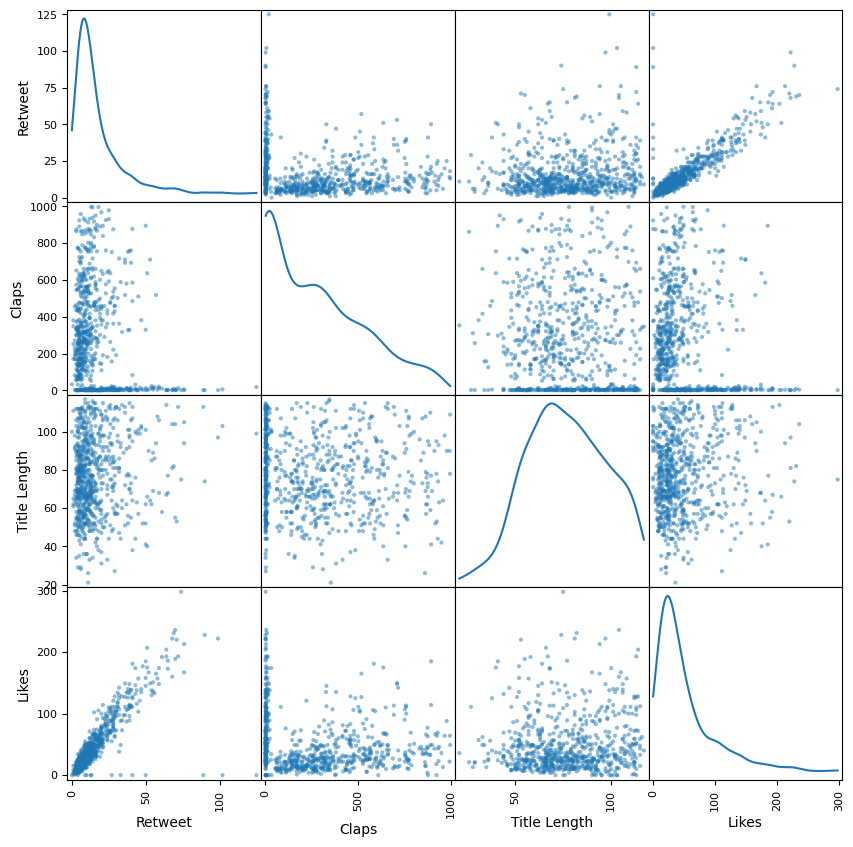

In [11]:
temp = pd.plotting.scatter_matrix(df, diagonal="kde", figsize=(10, 10))

We can notice for the image about, we can notice a clear relationship between the number of retweets and likes. They are directed connected, it means, the more retweets, the more likes the article will receive and vice versa.

**Categories that performed better**

Here we filtered the dataset and just analyzed the top 25% performers for each one of the features. We wanted to have a clear overview of how the categories perform compared between them. The outliers were removed.

In [13]:
PERCENTAGE = 25
# plot relation between the words used on medium title and the number of retweet/favorite/claps. Just for the top PERCENTAGE% performers
def plot_top_performers(lst_col):
    for el in columns:
        column = df[el['column_name']]
        class_name = el['column_name']
        if class_name != title_length:
            plt.figure(figsize=(10, 5))
            # remove outliers
            title_stat_top = remove_outliers(df, class_name)
            title_stat_top = title_stat_top.sort_values(by=[class_name], ascending=False).head(int(len(title_stat_top)*(PERCENTAGE/100.00)))
            x = pd.DataFrame({
                    col:np.repeat(title_stat_top[col].values, title_stat_top[lst_col].str.len())
                    for col in title_stat_top.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(title_stat_top[lst_col].values)})[title_stat_top.columns.tolist()]
            temp = x.groupby(lst_col).count()[class_name].sort_values(ascending=False).head(20).sort_values(ascending=True)
            temp.plot.barh()
            #sns.despine()
            plt.title('Most used {} on top {}% {}'.format(lst_col, PERCENTAGE, el['column_text']));

In [15]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    non_outliers = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
#     non_outliers = df[column] >= 0
    return df.loc[non_outliers]

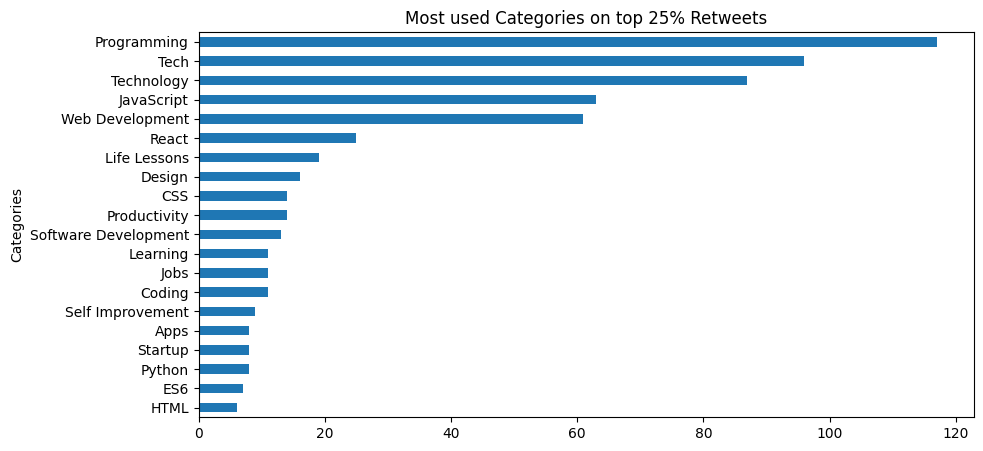

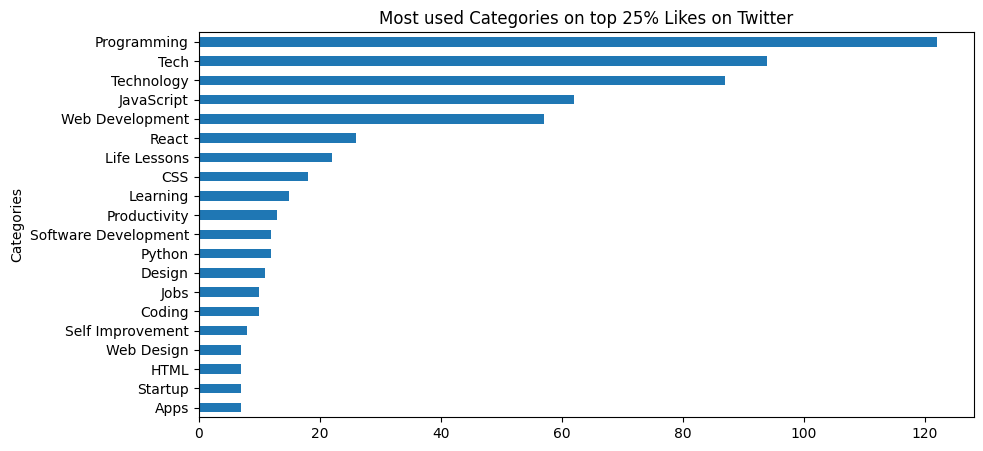

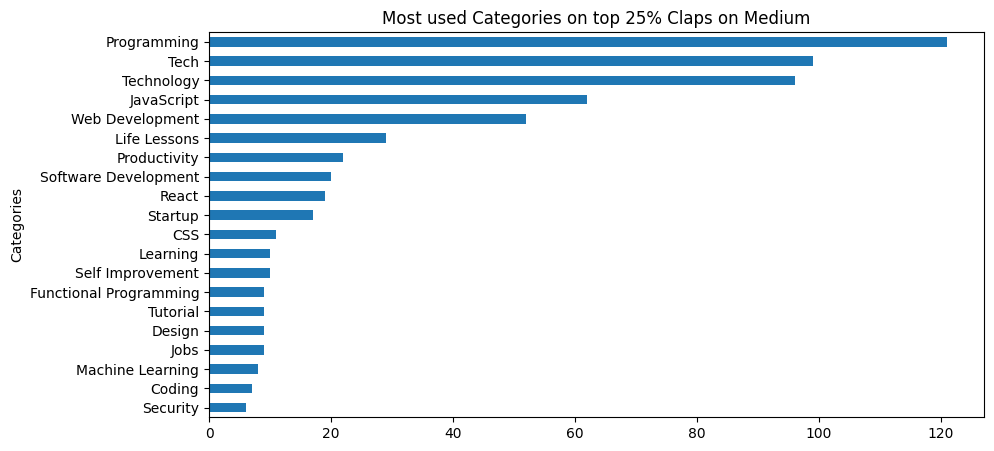

In [16]:
plot_top_performers('Categories')

From this statistic, we notice that articles created with the following categories can increase the number of retweets, likes and claps: "Programming", "Tech", "Technology", "JavaScript" and "Web Development".